<a href="https://colab.research.google.com/github/DSGP-Group-1-EAPS/SL-Apparel-Dataset/blob/Sandun-Karunatilleke/Catboost_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting using Catboost classification**

# Connecting Dataset

In [14]:
import pandas as pd
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from google.colab import drive

# Mounting the Google Drive
drive.mount('/content/drive')

# Reading the data from the excel file and removing blank spaces in each cell
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/preprocessed_data_new.xlsx')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Extracting and scaling data (Randomly)

In [15]:
# Extract features and target variable
X = data.drop('LeavesNextMonth', axis=1)  # All columns except 'LeavesNextMonth'
y = data['LeavesNextMonth']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Drop non-numeric columns before scaling
X_train_numeric = X_train.select_dtypes(include=['number'])
X_test_numeric = X_test.select_dtypes(include=['number'])

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

# Create and train the Catboost classification with increased iterations

In [16]:
model = CatBoostClassifier(iterations=100,
                           learning_rate=0.1,
                           depth=6,
                           loss_function='MultiClass')
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)
probabilities = model.predict_proba(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)


# Display results
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy:.4f}")


0:	learn: 1.9922400	total: 447ms	remaining: 44.2s
1:	learn: 1.8516996	total: 743ms	remaining: 36.4s
2:	learn: 1.7464727	total: 1.07s	remaining: 34.7s
3:	learn: 1.6592714	total: 1.28s	remaining: 30.8s
4:	learn: 1.5832436	total: 1.5s	remaining: 28.4s
5:	learn: 1.5219273	total: 1.7s	remaining: 26.7s
6:	learn: 1.4736331	total: 1.91s	remaining: 25.4s
7:	learn: 1.4316521	total: 2.13s	remaining: 24.6s
8:	learn: 1.3966922	total: 2.34s	remaining: 23.7s
9:	learn: 1.3633587	total: 2.55s	remaining: 23s
10:	learn: 1.3357425	total: 2.75s	remaining: 22.3s
11:	learn: 1.3128246	total: 2.96s	remaining: 21.7s
12:	learn: 1.2895253	total: 3.18s	remaining: 21.3s
13:	learn: 1.2660390	total: 3.39s	remaining: 20.8s
14:	learn: 1.2482400	total: 3.6s	remaining: 20.4s
15:	learn: 1.2305547	total: 3.81s	remaining: 20s
16:	learn: 1.2129283	total: 4.02s	remaining: 19.6s
17:	learn: 1.1992616	total: 4.24s	remaining: 19.3s
18:	learn: 1.1827496	total: 4.45s	remaining: 19s
19:	learn: 1.1699437	total: 4.66s	remaining: 18.6s

# Plotting feature importance

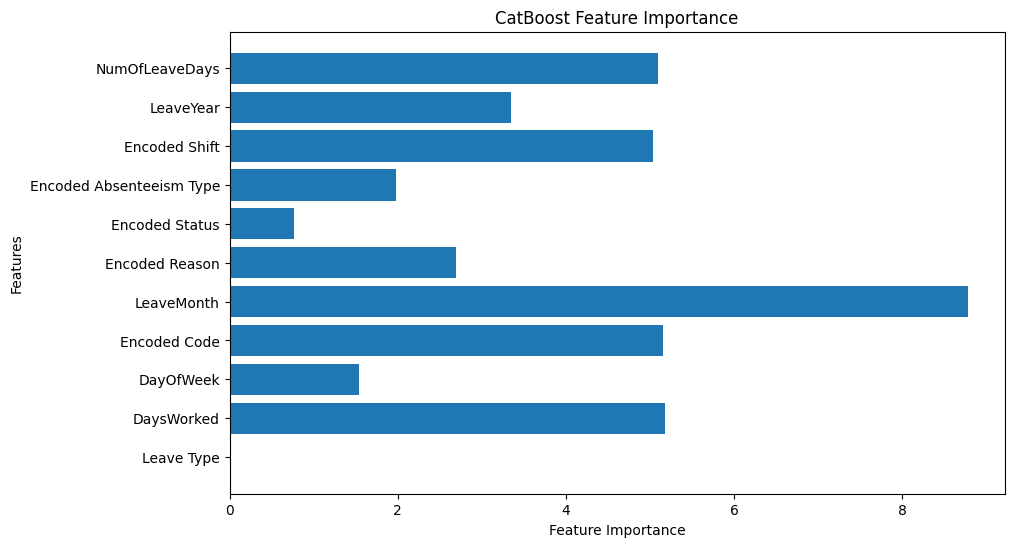

In [20]:
import matplotlib.pyplot as plt

# Get feature importance
feature_importance = model.feature_importances_
feature_names = X_train_numeric.columns

feature_importance = feature_importance[:-1]  # Remove the last element
feature_names = feature_names[:-1]  # Remove the last feature name


# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('CatBoost Feature Importance')
plt.show()


# Extracting and scaling data (Manually )

In [21]:
# Convert 'LeaveYear' and 'LeaveMonth' to datetime
data['LeaveDate'] = pd.to_datetime(data['LeaveYear'].astype(str) + '-' + data['LeaveMonth'].astype(str) + '-01')
data = data.sort_values('LeaveDate')  # Sort by date

# Choose a date to split the data into training and testing sets
split_date = pd.to_datetime('2023-06-01')

# Split the data based on the chosen date
train_data = data[data['LeaveDate'] < split_date]
test_data = data[data['LeaveDate'] >= split_date]

# Extract features and target variable for training set
X_train = train_data.drop(['LeavesNextMonth', 'TookLeaveNextMonth', 'LeaveDate'], axis=1)
y_train = train_data['LeavesNextMonth']

# Extract features and target variable for testing set
X_test = test_data.drop(['LeavesNextMonth', 'TookLeaveNextMonth', 'LeaveDate'], axis=1)
y_test = test_data['LeavesNextMonth']

# Drop non-numeric columns before scaling
X_train_numeric = X_train.select_dtypes(include=['number'])
X_test_numeric = X_test.select_dtypes(include=['number'])

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)



# Create and train the Catboost classification model with increased iterations

In [23]:
model = CatBoostClassifier(iterations=100,
                           learning_rate=0.1,
                           depth=6,
                           loss_function='MultiClass')
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)
probabilities = model.predict_proba(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)


# Display results
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy:.4f}")


0:	learn: 2.8706036	total: 200ms	remaining: 19.8s
1:	learn: 2.6789795	total: 323ms	remaining: 15.8s
2:	learn: 2.5534423	total: 429ms	remaining: 13.9s
3:	learn: 2.4556925	total: 620ms	remaining: 14.9s
4:	learn: 2.3720191	total: 826ms	remaining: 15.7s
5:	learn: 2.2934770	total: 1.17s	remaining: 18.4s
6:	learn: 2.2326248	total: 1.51s	remaining: 20.1s
7:	learn: 2.1790630	total: 1.85s	remaining: 21.3s
8:	learn: 2.1358522	total: 2.2s	remaining: 22.2s
9:	learn: 2.0977542	total: 2.51s	remaining: 22.6s
10:	learn: 2.0676740	total: 2.84s	remaining: 23s
11:	learn: 2.0385820	total: 3.19s	remaining: 23.4s
12:	learn: 2.0134573	total: 3.54s	remaining: 23.7s
13:	learn: 1.9840237	total: 3.86s	remaining: 23.7s
14:	learn: 1.9666011	total: 4.2s	remaining: 23.8s
15:	learn: 1.9501492	total: 4.54s	remaining: 23.9s
16:	learn: 1.9380734	total: 4.76s	remaining: 23.2s
17:	learn: 1.9237618	total: 4.95s	remaining: 22.5s
18:	learn: 1.9083248	total: 5.14s	remaining: 21.9s
19:	learn: 1.8939582	total: 5.34s	remaining: 